In [1]:
import spectral.io.envi as envi
#import spectral
from spectral import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wx
from wx import glcanvas
import numpy as np 
import warnings
import pandas as pd
#from IPython.html.widgets import *
from ipywidgets import *
#from IPython.html.widgets import interact # IPython < 4.x
from sys import platform  #Detect platform!



class UnsupportedPlatform(Exception):
    pass

In [2]:
ListRef = []
if "linux" in platform:
    print("linux GREAT :)")
    #Set path work!
    #Imaganes tomadas con la camara.
    ref_1_PATH = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/CARLOSIMAGENES_NEGRAS/carlos_3-8_15000_17000__15000_us_2x_2020-01-27T202248_corr'
    #print(ref_1_PATH+'.hdr')
    ListRef.append(envi.open( ref_1_PATH+'.hdr',ref_1_PATH+'.hyspex'))
    ref_2_PATH = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/CARLOSIMAGENES_NEGRAS/carlos_3-8_16000_17000__16000_us_2x_2020-01-27T202006_corr'
    ListRef.append(envi.open( ref_2_PATH+'.hdr',ref_2_PATH+'.hyspex'))
    ref_3_PATH = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/CARLOSIMAGENES_NEGRAS/carlos_3-8_16000_17000_v2_16000_us_2x_2020-01-27T202131_corr'
    ListRef.append(envi.open( ref_3_PATH+'.hdr',ref_3_PATH+'.hyspex'))
    
    #Imagenes con algo de procesamiento.
    BlackRerenceSingle_PATH = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/BlackReference_Single'
    ListRef.append(envi.open( BlackRerenceSingle_PATH+'.hdr', BlackRerenceSingle_PATH+'.hyspex'))
    BlackRerence_PATH       = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/BlackReference_001'
    ListRef.append(envi.open( BlackRerence_PATH + '.hdr', BlackRerence_PATH + '.hyspex'))     
    
    print('Tamaño lista: ' + str(len(ListRef)))
    
    #Datos para hacer los ejemplos
    example_lan = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/Lib/92AV3C.lan' 
    example_spc = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/Lib/92AV3C.spc'
    example_GIS = '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/Lib/92AV3GT.GIS'
    img = open_image(example_lan).load()
    gt = open_image(example_GIS).read_band(0)
    
elif "darwin" in platform:
    print("mac")
    print("No support!!!!!!")
elif "win" in platform:
    print("windows TAAAA :(")
    #Set path work!
    #Imaganes tomadas con la camara.
    ref_1_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_15000_17000__15000_us_2x_2020-01-27T202248_corr'
    #print(ref_1_PATH+'.hdr')
    ListRef.append(envi.open( ref_1_PATH+'.hdr',ref_1_PATH+'.hyspex'))
    ref_2_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_16000_17000__16000_us_2x_2020-01-27T202006_corr'
    ListRef.append(envi.open( ref_2_PATH+'.hdr',ref_2_PATH+'.hyspex'))
    ref_3_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_16000_17000_v2_16000_us_2x_2020-01-27T202131_corr'
    ListRef.append(envi.open( ref_3_PATH+'.hdr',ref_3_PATH+'.hyspex'))
    
    #Imagenes con algo de procesamiento.
    BlackRerenceSingle_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\BlackReference\BlackReference_Single'
    ListRef.append(envi.open( BlackRerenceSingle_PATH+'.hdr', BlackRerenceSingle_PATH+'.hyspex'))
    BlackRerence_PATH       = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\BlackReference\BlackReference_001'
    ListRef.append(envi.open( BlackRerence_PATH + '.hdr', BlackRerence_PATH + '.hyspex'))     
    
    print('Tamaño lista: ' + str(len(ListRef)))
    
    #Datos para hacer los ejemplos
    example_lan = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\Example\92AV3C.lan' 
    example_spc = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\Example\92AV3C.spc'
    example_GIS = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\Example\92AV3GT.GIS'
    img = open_image(example_lan).load()
    gt = open_image(example_GIS).read_band(0)
    print('Cargar los ejemplos!')
else:
    raise UnsupportedPlatform

linux GREAT :)
Tamaño lista: 5


In [3]:
#Ver las listas cargadas.
for i in range(len(ListRef)):
    print('############################################################################################################################################################################')
    print('Lista Número ' + str(i) + ': ')
    print(ListRef[i])
print('############################################################################################################################################################################')

############################################################################################################################################################################
Lista Número 0: 
	Data Source:   '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/CARLOSIMAGENES_NEGRAS/carlos_3-8_15000_17000__15000_us_2x_2020-01-27T202248_corr.hyspex'
	# Rows:           1000
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
############################################################################################################################################################################
Lista Número 1: 
	Data Source:   '/home/juandval/GitHub/UNAL/GoogleDrive/Tools/CARLOSIMAGENES_NEGRAS/carlos_3-8_16000_17000__16000_us_2x_2020-01-27T202006_corr.hyspex'
	# Rows:           1000
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
##############################

ImageView object:
  Display bands       :  [55, 41, 12]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 124.0]
    G: [0.0, 129.0]
    B: [0.0, 139.0]

(1000, 1600, 160)


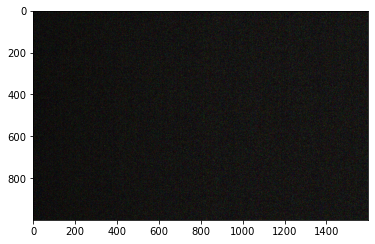

In [16]:
Counter_List = 2
view = imshow(ListRef[Counter_List])
print(view)
print(ListRef[Counter_List].shape)

In [17]:
#ejemplo: http://www.spectralpython.net/algorithms.html
(m, c) = kmeans(img, 20, 30)

spectral:INFO: k-means iteration 1 - 21024 pixels reassigned.
spectral:INFO: k-means iteration 2 - 11214 pixels reassigned.
spectral:INFO: k-means iteration 3 - 4726 pixels reassigned.
spectral:INFO: k-means iteration 4 - 1767 pixels reassigned.
spectral:INFO: k-means iteration 5 - 1240 pixels reassigned.
spectral:INFO: k-means iteration 6 - 1420 pixels reassigned.
spectral:INFO: k-means iteration 7 - 1442 pixels reassigned.
spectral:INFO: k-means iteration 8 - 1205 pixels reassigned.
spectral:INFO: k-means iteration 9 - 1041 pixels reassigned.
spectral:INFO: k-means iteration 10 - 934 pixels reassigned.
spectral:INFO: k-means iteration 11 - 977 pixels reassigned.
spectral:INFO: k-means iteration 12 - 1027 pixels reassigned.
spectral:INFO: k-means iteration 13 - 1019 pixels reassigned.
spectral:INFO: k-means iteration 14 - 1011 pixels reassigned.
spectral:INFO: k-means iteration 15 - 904 pixels reassigned.
spectral:INFO: k-means iteration 16 - 702 pixels reassigned.
spectral:INFO: k-me

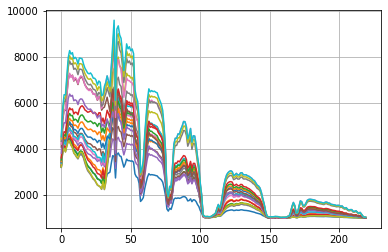

In [18]:
plt.figure()
for i in range(c.shape[0]):
    plt.plot(c[i])
plt.grid()

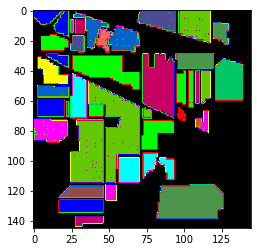

In [32]:
v = imshow(classes=gt)

In [19]:
classes = create_training_classes(img, gt)

In [20]:
gmlc = GaussianClassifier(classes)

spectral:INFO: Setting min samples to 220
spectral:WARNING: Omitting class   1 : only 54 samples present
spectral:WARNING: Omitting class   7 : only 26 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present
spectral:WARNING: Omitting class  13 : only 212 samples present
spectral:WARNING: Omitting class  16 : only 95 samples present


In [21]:
clmap = gmlc.classify_image(img)

Processing...  0.0Processing...  9.1Processing... 18.2Processing... 27.3Processing... 36.4Processing... 45.5Processing... 54.5Processing... 63.6Processing... 72.7Processing... 81.8Processing... 90.9Processing... 100.Processing...done   


/home/juandval/anaconda3/envs/UNAL_Python37/lib/python3.7/site-packages/spectral/graphics/spypylab.py:904: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.class_axes = plt.imshow(self.class_rgb, **kwargs)


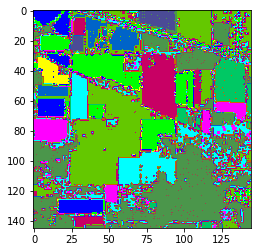

In [22]:
v = imshow(classes=clmap)

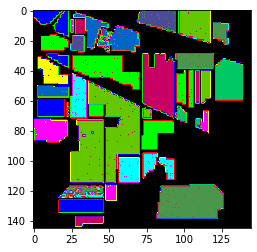

In [23]:
gtresults = clmap * (gt != 0)
v = imshow(classes=gtresults)

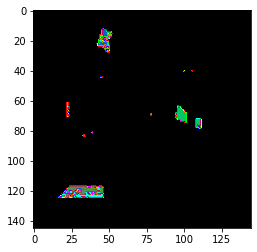

In [24]:
gterrors = gtresults * (gtresults != gt)
v = imshow(classes=gterrors)

#Ver los datos de los valores en negro.